

<img src = 'TikTok.png.webp' width = '400' height = '300'>

## Scenario:
TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.<br>
You receive a new email from Mary Joanna Rodgers, one of TikTok’s project management officers. Mary Joanna informs the data team about a new request: to determine whether there is a statistical difference in the data of TikTok videos posted by verified accounts versus unverified accounts. You also receive follow-up emails from Data Science Manager, Rosie Mae Bradshaw and Data Science Lead, Willow Jaffey. They want you to assess the viewership on both types on accounts and want to gauge the average viewership of both the accounts. 

## Problem Statement:
Build a **confidence interval** for viewership on both the accounts. Furthermore, conduct a **A/B testing** on views for verified versus non verified accounts. Choose a suitable feature or field to be most insightful to test verified and unverifed accounts.

## Objective:
The suitable feature to give insights into verified VS unverified accounts will be **'$Views$'**
* Build confidence interval for the viewership for both accounts respectively.
* Conduct 2 sample hypothesis test to assess if the difference between the views of verified and non verified accounts is statiscally significant or not.

## Approach:
- Find descriptive stats
- Perform EDA
- Build confidence interval
    - Identify sample statistic: MEAN
    - Choose confidence level: 95% and 99%
    - Find Standard Error
    - Find MOE
    - Calculate interval
- Conduct A/B testing
    - Find sample MEAN
    - State Ho and Ha
    - Choose significance level ( 5% )
    - Find p-value
    - Reject or fail to reject Ho

## Excecutive summary:

In [2]:
# Load data:
import numpy as np 
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
tiktok = pd.read_csv('tiktok_dataset.csv', index_col=0)
tiktok.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
#,,,,,,,,,,,
1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [9]:
# Make a copy:
df = tiktok.copy()

# Decriptive Stats:
tiktok.describe(include = 'all')

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


### Handling missing values:

In [10]:
# Dataframe for Nulls and their percentage in column 
nulls = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns = ['perecntage_nulls'])
nulls['total_nulls'] = df.isnull().sum()
nulls


,perecntage_nulls,total_nulls
claim_status,1.537509,298
video_id,0.000000,0
video_duration_sec,0.000000,0
video_transcription_text,1.537509,298
verified_status,0.000000,0
author_ban_status,0.000000,0
video_view_count,1.537509,298
video_like_count,1.537509,298
video_share_count,1.537509,298
video_download_count,1.537509,298


In [11]:
# Dropping missing values:
df.dropna(inplace = True)

In [13]:
df['claim_status'].value_counts()

claim      9608
opinion    9476
Name: claim_status, dtype: int64

In [14]:
df['verified_status'].value_counts()

not verified    17884
verified         1200
Name: verified_status, dtype: int64

Since our dataset is evenly distributed wrt claim_status, it would be better to segregate our data based on *verified_status* feature and generate 50 random samples for the same. As there will verified accounts that having claims and also non verified accounts, not having claims. Our assessment is based on the the status of the account being verified or unverified

<AxesSubplot:xlabel='verified_status', ylabel='video_view_count'>

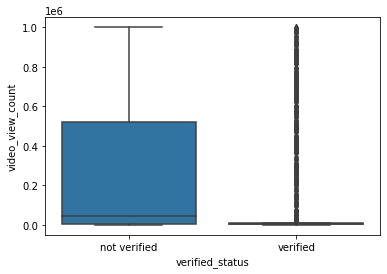

In [19]:
sns.boxplot(x = df['verified_status'], y = df['video_view_count'])

# Building Confidence Interval:

In [22]:
df.groupby('verified_status')['video_view_count'].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

### Create our two samples based on Video Views feature

In [27]:
# Seperate the two samples
verified_views = df[df['verified_status'] == 'verified']['video_view_count']
non_verified_views = df[df['verified_status'] == 'not verified']['video_view_count']

verified_views.shape

(1200,)

In [26]:
# Calculate mean of either samples
verified_mean = verified_views.mean()
non_verified_mean = non_verified_views.mean()

print('Non verified account views: ', round(non_verified_mean,2))
print('Verified account views: ', round(verified_mean, 2))

Non verified account views:  265663.79
Verified account views:  91439.16


### Choose confidence level

* Confidence level is 95%  (Z Score of 1.96)
* Confidence level is 99%  (Z Score of 2.576)

### Calculate Std Error

In [29]:
# Std Error:
verified_std_error = verified_views.std() / np.sqrt(verified_views.shape[0])
non_verified_std_error = non_verified_views.std() / np.sqrt(non_verified_views.shape[0])

print('Std Error for Verified Acc views:', verified_std_error)
print('Std Error for Non Verified Acc views:', non_verified_std_error)

Std Error for Verified Acc views: 6383.726272925682
Std Error for Non Verified Acc views: 2435.3493437842335


### Build the confidence intervals:

In [38]:
verified_confidence = stats.norm.interval(alpha=0.95, scale = verified_std_error, loc=verified_mean)

non_verified_confidence = stats.norm.interval(alpha=0.95, scale = non_verified_std_error, loc=non_verified_mean)

print('Mean range of views for Verified accounts:', verified_confidence)
print('Mean range of views for Non Verified accounts::', non_verified_confidence)

Mean range of views for Verified accounts: (78927.29058457022, 103951.03774876312)
Mean range of views for Non Verified accounts:: (260890.58833526, 270436.9823424407)


# A/B Testing:

### Calculate the mean statistic for number of views

In [32]:
print('Mean Non verified account views: ', round(non_verified_mean,2))
print('Mean Verified account views: ', round(verified_mean, 2))

Mean Non verified account views:  265663.79
Mean Verified account views:  91439.16


### State Hypothesis:

* **Null hypothesis**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).
* **Alternative hypothesis**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

### Choose significance level:
The probability of rejecting the null hypothesis if it is true OR the threshold at which consider our results to be statistically significant 
* Significance Level = 5%

### Calculate p-value:


In [33]:
stats.ttest_ind(a=verified_views, b=non_verified_views, equal_var=False)

Ttest_indResult(statistic=-25.499441780633777, pvalue=2.6088823687177823e-120)



> *Since our **P-value < Significance level** we reject our null hypothesis. Hence, our results are statiscally significant and not by chance alone.*

## Conclusions:

* The average viewership for non verfied accounts is significantly more (twice) than verified accounts.
* The average viewership for verified account and non verified accounts is as follows:
    - Verified accounts: (78927.29058457022, 103951.03774876312)
    - Non Verified accounts: (260890.58833526, 270436.9823424407)
* The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.
* It would be interesting to investigate the root cause of this behavioral difference. For example, 
    - Do unverified accounts tend to post more clickbait-y videos? 
    - Or are unverified accounts associated with spam bots that help inflate view counts?

## Next Steps:
- The next step will be to build a regression model on verified_status. A regression model is the natural next step because the end goal is to make predictions on claim status. A regression model for verified_status can help analyze user behavior in this group of verified users. 
- Technical note to prepare regression model: because the data is skewed, and there is a significant difference in account types, it will be key to build a logistic regression model